# Height and Weight Prediction Activity

Contoso Data Systems is creating a new product to predict the height or weight of a person.

In this project, you’ll use linear regression models to predict the height or weight of a person.

## About the data: 

Human Height and Weight are mostly heritable, but lifestyles, diet, health and environmental factors also play a role in determining an individual's physical characteristics. The dataset below contains 10,000 synthetic records of human heights and weights of 18 years old children. These data were simulated based on a 1993 by a Growth Survey of 10,000 children from birth to 18 years of age recruited from Maternal and Child Health Centres (MCHC) and schools and were used to develop Hong Kong's current growth charts for weight, height, weight-for-age, weight-for-height and body mass index (BMI).

## Linear Regression

Linear regression is a statistical method that summarizes the relationship between two quantitative data and defines uncertain relationships between two variables.

`y = a.x + b` – This equation defines a linear regression, 

where y is a dependent variable, x is an independent variable, and b is a constant.

The linear regression equation tries to predict the approximate relationship between the dependent and independent variables. In the real world, data will not fit this equation. This is because the real world isn’t always nice and neat like this. Sometimes your data have curved relationships between variables. In a curved relationship, the change in the dependent variable associated with a one unit shift in the independent variable varies based on the location in the observation space. In other words, the effect of the independent variable is not a constant value. 

We may have to add other terms to our equation to bend our lines, or change the way that outliers may skew our regression analysis. We have to be prepared to go deep in our understanding of the data and how linear regression works.


## The activity: Data Visualization

We want to make data accessible to people so that they can draw their own conclusions from the data, these conclusions are drawn from the expertise that we as data scientists need to have in the subject we are studying. We refer this as domain expertise and it is incredibly important for us to know something about the data before we can begin to create models and experiments.

Why do we need domain expertise? We need to know about our data because we have to not only ask questions that our data can reasonably answer within our model, but also so that we can deal with certain situations that we might come across when we do our data munging and wrangling. The more we know about our data, the better we can address null values with realistic and appropriate fill values. Also, in some cases we might have to drop columns and without prior knowledge we might be removing data from our experiements that we need to come up with high quality outcomes.

In this activity we will use two common forms of exploratory data visualizations: single column visualizations and two-column visualizations. As you may have inferred from the names, the single column visualization is used to show the shape of your data and the two-column highlights the relationship between two variables in a dataset.

Some of these shapes we will see in the single column visualizations are idealized shapes, we call these shapes distributions. Distributions are standard patterns that statisticians have used for years to describe data. When you find a distribution in your data, or when you find one of these shapes, you can make some broad inferences about your data. 

Let's  begin by loading the data and the tools that we will use to view the data in Python. In this case numpy and pandas. Even though this data only has three fields. It's actually a fairly complex and interesting dataset that we can use to illustrate many of the ideas we use as data scientists on a daily basis.

In [72]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from lmfit.models import LorentzianModel

df = pd.DataFrame(pd.read_csv('Data/01_heights_weights_genders.csv', index_col=[0]))
df.head()

,Height,Weight
Gender,,
Male,73.847017,241.893563
Male,68.781904,162.310473
Male,74.110105,212.740856
Male,71.730978,220.042470
Male,69.881796,206.349801


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, Male to Female
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Weight  10000 non-null  float64
dtypes: float64(2)
memory usage: 234.4+ KB


# Looking at different plots

As a data scientist you must first get to know your domain and the data that is being collected within that field. Let's do a deep dive and display some plots of the data just so that we can see how they look. The results of this type of review are unknown and we can only look for nuances and things that we may have not thought about before.

As we look at different plots, we train ourselves to spot anomalies and other features that we may not have noticed if we were to just do the most basic review of the data.

In [74]:
# Use a '?' question mark after a keyword and explore what each function does below:
# It is always a good idea to review the documentation before you execute a command
df.plot?

## Here is part the output of `df.plot?`, notice the types of plots you can create:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot.
  
 You can learn more about [pandas.DataFrame.plot by reading the documentation.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

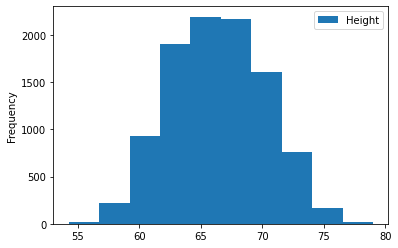

In [75]:
# Now let's run the code and first create a histogram with just the height data
df.plot(kind='hist', x=1)

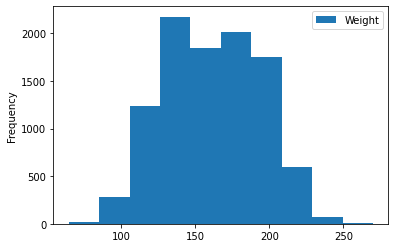

In [76]:
# Now let's run the code and first create a histogram with just the weight data
df.plot(kind='hist', y=1)

Let’s get started by just visualizing the heights and weights data that we’ve been working with so far. We chosen this dataset because it can be used to illustrate many of the tasks that we use daily when working with data. 

The most typical single-column visualization technique that people use is the histogram. In a histogram, you divide your data set into bins and then count the number of entries in your data that fall into each of the bins.

When we run a default histogram on our height and weight data, we'll see histograms for both with the default number of bins. 

In [77]:
# Let's explore the histogram a bit more by looking at the built-in documentation.
df.hist?

# Configuring Histograms

Just as we were able to configure plots using the .plot() function, we can also specifically configure for a specific type of plot, like a histogram. 

A histogram is an approximate representation of the distribution of numerical or categorical data. It was first introduced by Karl Pearson. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but not required to be) of equal size.


## Setting bins and smoothing

How many bins should we use? Try using just one bin. You'll notice that with one (1) bin you will not get any distribution it will just be a solid plot.  Most of the entries are in the middle of your data, near the mean and median height. 

But there’s a danger that this shape is an illusion caused by the type of histogram we’re using. One way to check that we are viewing a good histogram that isn't creating any 'illusions' is to try using several different bin levels. 

This is something you should always keep in mind when working with histograms: the number of bins you use impose external structure on your data at the same time that they reveal internal structure in your data. The patterns you find, even when they’re real, can go away very easily if you use the wrong settings for building a histogram. 

Try using five (5) bins and the solid structure dissappears, but we still have a peak like a bell curve. When we use too few bins like this, we run into the risk of undersmoothing our plot. Conversely when we use too many, we oversmooth. 

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda2f66c630>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda2f64dac8>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda3049c860>]]


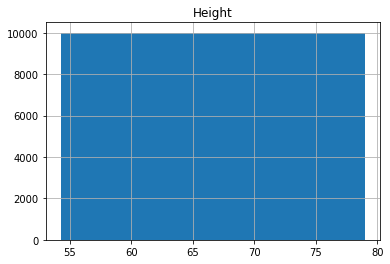

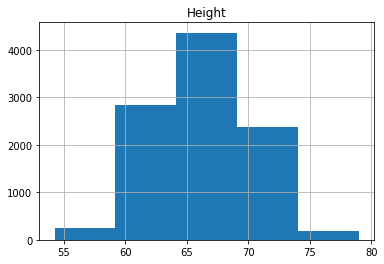

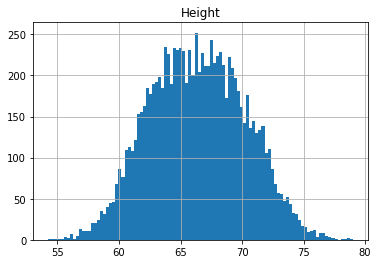

In [78]:
# Way undersmoothed
print(df.hist(column='Height', bins=1))
print(df.hist(column='Height', bins=5))

# Oversmoothed?
print(df.hist(column='Height', bins=100))

When we use more bins we get closer and closer to a U-shaped bell curve distribution that we might expect from our data. In the first plot we are only using one bin, which gives us very little information. As we increase the bin size we increase the amount of information that's communicated to us via the distribution. Understanding how to read histograms is as important as creating them.

### Exercise: creating other plot types



Let's look at some other plots. Can you figure out how to create a KDE or Density plot? KDE stands for Kernel Density Estimation plot, which is the same as a density plot. Creating KDE plots is something we do when we are performing density estimation.

Density estimation is important and helps us make assumptions about the distribution of the underlying data, in this case the distribution of the values of height and weight individually. `scikit-learn` provides us with some great tools and one of them is creating KDE plots.

Try your hand at creating some other plots. Start with KDE and then try a scatter plot.

**Pro-Tip** open the interactive help for .plot to see all the parameters and write your code with it open for reference.

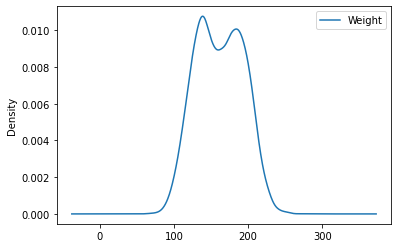

In [79]:
# Possible solution
# df.plot(kind='kde', x=1)
df.plot(kind='kde', x=0)

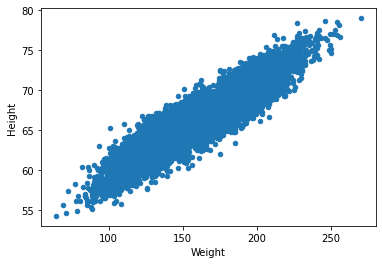

In [80]:
df.plot(kind='scatter',x=1,y=0)

# Examing the Relationship between Height and Weight

After looking at some histograms, we can look at how height and weight look like when plotted together. We can expect some sort of linear relationship there. Intuitively we know that as a person gets taller their weight will increase. 

### Fitting our data to a model

As a new scientist, one of the most powerful python skills you can develop is curve and peak fitting. Whether you need to find the slope of a linear-behaving data set, extract rates through fitting your exponentially decaying data to mono or multi-exponential trends, or deconvolute spectral peaks to find their centers, intensities, and widths, the [lmfit.model library](https://lmfit.github.io/lmfit-py/builtin_models.html) allows you to easily do so, and then generate a beautiful plot of your results.

In [81]:
# We've already imported the Lorentzian model from the outset so let's assign it to a variable
# Let's fit our data to the model all in one cell and store the results.
model = LorentzianModel()
params = model.guess(df['Weight'], x=df['Height'])
result = model.fit(df['Weight'], x=df['Height'])

Learn about non-linear least squares minimization models
https://lmfit.github.io/lmfit-py/builtin_models.html


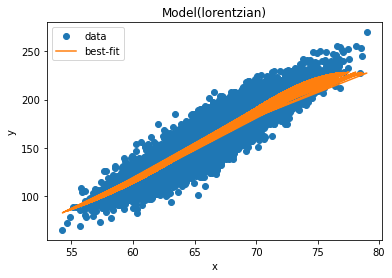

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 97
    # data points      = 10000
    # variables        = 3
    chi-square         = 1470308.63
    reduced chi-square = 147.074985
    Akaike info crit   = 49912.4251
    Bayesian info crit = 49934.0562
[[Variables]]
    amplitude:  12720.2426 +/- 150.386894 (1.18%) (init = 1)
    center:     77.8443172 +/- 0.18327583 (0.24%) (init = 0)
    sigma:      17.7169596 +/- 0.12889522 (0.73%) (init = 1)
    fwhm:       35.4339193 +/- 0.25779044 (0.73%) == '2.0000000*sigma'
    height:     228.536906 +/- 1.21320562 (0.53%) == '0.3183099*amplitude/max(2.220446049250313e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, center) =  0.990
    C(amplitude, sigma)  =  0.956
    C(center, sigma)     =  0.915


In [82]:
result.plot_fit()
plt.show()

print(result.fit_report())

The **Lorentzian model** is a model that was developed by two statisticians named Cauchy and Lorentz. This model is a single peaked model that performs some very complex calculations that we don't need to go into a whole lot of depth in this workshop. 

What we need to understand is sometimes data doesn't always fit to the strict linear representations we might expect. In this experiment we can see there is a strong linear relationship here between height and weight--but the task of fitting our data to a model is one that we will do many times in our careers as scientists, so we might as well take the time to try it here and learn something new.

The link that's provided above can help you understand all the math behind this interesting model.

# How do height and weight depend on gender?
Intuitively, we do recognize a relationship between gender and height/weight--but we might be biased based on the people we know and might create some false assumptions. The beauty of data science is that we can break the data up by gender and look at the the numbers to validate our assumptions, or make us change our minds.

In [83]:
# First let's look at both together. Then we'll take a look at gender separately.

df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [84]:
hgt_wgt_gender=df.groupby('Gender')

In [85]:
print(hgt_wgt_gender.describe())

        Height                                                        \
         count       mean       std        min        25%        50%   
Gender                                                                 
Female  5000.0  63.708774  2.696284  54.263133  61.894441  63.730924   
Male    5000.0  69.026346  2.863362  58.406905  67.174679  69.027709   

                              Weight                                     \
              75%        max   count        mean        std         min   
Gender                                                                    
Female  65.563565  73.389586  5000.0  135.860093  19.022468   64.700127   
Male    70.988744  78.998742  5000.0  187.020621  19.781155  112.902939   

                                                        
               25%         50%         75%         max  
Gender                                                  
Female  122.934096  136.117583  148.810926  202.237214  
Male    173.887767  187.033546  200

Using `groupby` and `describe` we can examine quantiles for height and weight basd on gender all at once.

### Taking another look at Density Plots

In earlier sections we briefly looked at density estimation and density plots. Let's review that information: A density plot is a smoothed, continuous version of a histogram estimated from the data. The most common form of density estimation is known as Kernel Density Estimation. 

In this method, a continuous curve (the kernel) is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. The kernel most often used is a Gaussian (which produces a Gaussian bell curve at each data point).

We'll use KDE plots here to visualize our data and see how they relate. 

In [86]:
# Let's first extract the height data for both genders and check the data quickly with .head
height = df['Height']

In [87]:
# PRO-TIP By using the - minus sign and entering a negative number into the head method, you can
# head and tail the dataframe we just created.

height.head(-5)

Gender
Male      73.847017
Male      68.781904
Male      74.110105
Male      71.730978
Male      69.881796
            ...    
Female    63.179498
Female    62.636675
Female    62.077832
Female    60.030434
Female    59.098250
Name: Height, Length: 9995, dtype: float64

In [88]:
# Now let's separate genders using the .loc function, remember we can select by the values in the gender feature.
m_hgt=height.loc['Male']

In [89]:
f_hgt=height.loc['Female']

In [90]:
# Now let's verify that it worked.
print(m_hgt)
print(f_hgt)

Gender
Male    73.847017
Male    68.781904
Male    74.110105
Male    71.730978
Male    69.881796
          ...    
Male    68.860062
Male    68.973423
Male    67.013795
Male    71.557718
Male    70.351880
Name: Height, Length: 5000, dtype: float64
Gender
Female    58.910732
Female    65.230013
Female    63.369004
Female    64.479997
Female    61.793096
            ...    
Female    66.172652
Female    67.067155
Female    63.867992
Female    69.034243
Female    61.944246
Name: Height, Length: 5000, dtype: float64


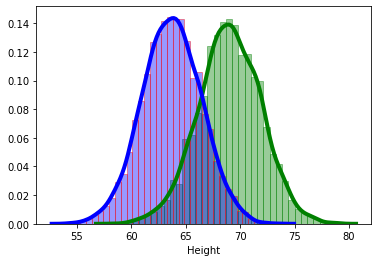

In [91]:
# We haven't imported seaborn yet so let's do that now. Also we can plot the values on top of eachother
# when we run both plots in the same cell
import seaborn as sns
# The men are green
sns.distplot(m_hgt, hist=True, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'green'},
             kde_kws={'linewidth': 4})
# We'll make the women blue
sns.distplot(f_hgt, hist=True, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})

For men there is a little bump around 6 feet (72 inches). (Maybe the measurers generously rounded up the guys who are 5'11.5".) However the distributions look pretty close. Comparing the plots makes it pretty clear. It looks like these are two normal distributions with different means. 

In the next section we'll use a quantile-quantile plot (Q-Q plots) which we'll describe in depth.

## Q-Q Plots

In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.[1] First, the set of intervals for the quantiles is chosen. A point (x, y) on the plot corresponds to one of the quantiles of the second distribution (y-coordinate) plotted against the same quantile of the first distribution (x-coordinate). Thus the line is a parametric curve with the parameter which is the number of the interval for the quantile.

If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the line y = x. If the distributions are linearly related, the points in the Q–Q plot will approximately lie on a line, but not necessarily on the line y = x. Q–Q plots can also be used as a graphical means of estimating parameters in a location-scale family of distributions.

A Q–Q plot is used to compare the shapes of distributions, providing a graphical view of how properties such as location, scale, and skewness are similar or different in the two distributions. Q–Q plots can be used to compare collections of data, or theoretical distributions. The use of Q–Q plots to compare two samples of data can be viewed as a non-parametric approach to comparing their underlying distributions. A Q–Q plot is generally a more powerful approach to do this than the common technique of comparing histograms of the two samples, but requires more skill to interpret. Q–Q plots are commonly used to compare a data set to a theoretical model.[2][3] This can provide an assessment of "goodness of fit" that is graphical, rather than reducing to a numerical summary. Q–Q plots are also used to compare two theoretical distributions to each other.[4] Since Q–Q plots compare distributions, there is no need for the values to be observed as pairs, as in a scatter plot, or even for the numbers of values in the two groups being compared to be equal.

To create the Q-Q plot we'll import the [StatsModel module](https://www.statsmodels.org/stable/index.html) so we can have access to the Q-Q plots. We'll plot the same data that we used in our KDE plots above.

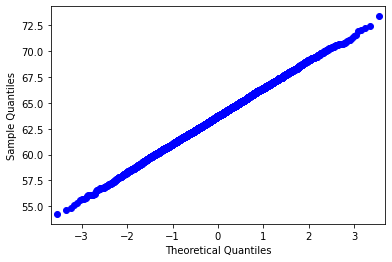

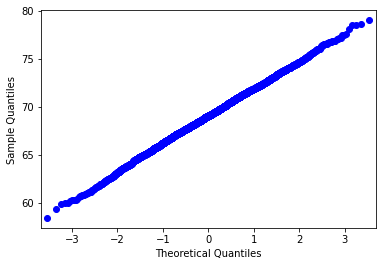

In [92]:
import statsmodels.api as sm
import pylab

sm.qqplot(f_hgt)
sm.qqplot(m_hgt)
pylab.show()

As you can see very clear linear relationships between male and female height. These distributions appear to reinforce our assumption that we made in during the KDE plots--that men and women's height distributions are normal (or without error and/or outliers -- we have a bell shaped curve and a relatively straight line), and we can confirm a linear relationship.

## Relationship between height and weight by gender

We saw earlier that there is a good linear fit of weight versus height, but the distributions of these vary by gender. It's natural to ask if there is a significant difference between the linear fits. Since we have spent a long time working with this data, we can probably assume that there will be very little difference. But let's check. First plot the points colored by gender. Then we will use seaborn again to do the best fit lines.

In [93]:
men = df.loc['Male']

In [94]:
women = df.loc['Female']

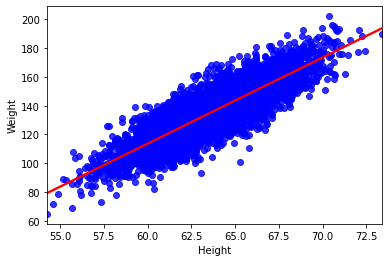

In [95]:
# First let's scatter plot the female's data along with an alternately colored line
sns.regplot(women['Height'], women['Weight'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})

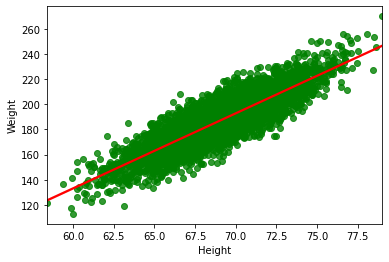

In [96]:
# Now the guys
sns.regplot(men['Height'], men['Weight'], scatter_kws={"color": "green"}, line_kws={"color": "red"})

Visually, the slopes of the best fit lines appear to be very close. When we calculate the slopes using the x and y values, the men's line has an approximate slope of 4 while the women's line is 4.3 so very close indeed.

### Conclusions and takeaways

The results from our study are clear and the procedures that we've perfromed in this workshop should have taught you how to create a variety of different plots. We learned some more about models and the importance of having well develop data fitting skills. 

Using data visualization we were able to confirm the strong linear relationships between the heights and weights of the men and women whose data we explored in this project. We also learned a thing or two about fitting distributions with models using density estimation and KDE plots. 

We've completed this project and uncovered models that can help us predict a person's height and weight using linear regression. Goal achieved! Well Done. Now, go back through this project and look for other ways to visual the data, and practice your data fitting skills.